# DFT calculation of Graphene

In [30]:
from ase import Atoms
from ase.io import write, read
from ase.lattice.hexagonal import *
from ase.visualize import view
from ase.units import Bohr
from ase.lattice.cubic import BodyCenteredCubic
from ase.build import bulk
from ase.spacegroup import crystal
from gpaw import GPAW, FermiDirac, PoissonSolver, Mixer
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import Image, display

### Single Lithium atom in a vaccuum

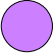

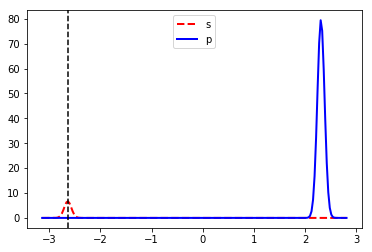

In [29]:
Li0 = Atoms('Li', positions=[(0, 0, 0)], cell=[10,10,10], pbc=[0,0,0])
Li0.center()
write('Li0.png', Li0)
display(Image(filename='Li0.png'))

calcLi0 = GPAW(xc='LDA', 
               mode="lcao",
               basis='dzp',
               txt='Li0.txt')

Li0.set_calculator(calcLi0)
eLi0 = Li0.get_potential_energy()
calcLi0.write('Li0.gpw')

calcLi0 = GPAW('Li0.gpw', txt=None)

try:
    efLi0 = calcLi0.get_fermi_level()
except ValueError:
    efLi0 = 0
energyLi0, dosLi0 = calcLi0.get_orbital_ldos(0, spin=0, angular='spdf', width=0.1)

enLi0 = energyLi0
#enLi0 = (energyLi0 - efLi0)

Spdos_Li0 = [0] * len(dosLi0)
Ppdos_Li0 = [0] * len(dosLi0)
Dpdos_Li0 = [0] * len(dosLi0)
temp = calcLi0.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Li0 = list(np.array(Spdos_Li0) + np.array(temp))
temp = calcLi0.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Li0 = list(np.array(Ppdos_Li0) + np.array(temp))
temp = calcLi0.get_orbital_ldos(0, spin=0, angular='d', width=0.1)[1]
Dpdos_Li0 = list(np.array(Dpdos_Li0) + np.array(temp))

#plt.plot(enLi0, dosLi0, 'k-', linewidth = 4.0, label='dos')
plt.plot(enLi0, Spdos_Li0, 'r--', linewidth = 2.0, label = 's')
plt.plot(enLi0, Ppdos_Li0, 'b-',linewidth = 2.0, label = 'p')
#plt.plot(enLi0, Dpdos_Li0, 'g-.',linewidth = 2.0, label = 'd')
plt.axvline(x=efLi0, color='k', linestyle='--')

#plt.xlim(-5,5)
#plt.ylim(0,10)
plt.legend()
plt.show()

### Two lithium atoms in a vacuum

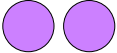

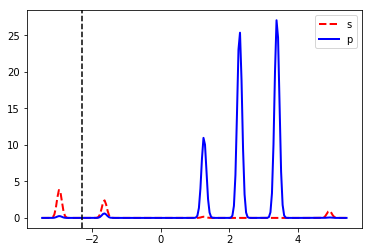

In [31]:
Li_2 = Atoms('Li2', positions=[(0, 0, 0), (3.04, 0, 0)], cell=[10,10,10], pbc=[0,0,0])
Li_2.center()
write('Li_2.png', Li_2)
display(Image(filename='Li_2.png'))

calcLi_2 = GPAW(xc='LDA', 
               mode="lcao",
               basis='dzp',
               txt='Li_2.txt')

Li_2.set_calculator(calcLi_2)
eLi_2 = Li_2.get_potential_energy()
calcLi_2.write('Li_2.gpw')

calcLi_2 = GPAW('Li_2.gpw', txt=None)

try:
    efLi_2 = calcLi_2.get_fermi_level()
except ValueError:
    efLi_2 = 0
energyLi_2, dosLi_2 = calcLi_2.get_orbital_ldos(0, spin=0, angular='spdf', width=0.1)

enLi_2 = energyLi_2
#enLi_2 = (energyLi_2 - efLi_2)

Spdos_Li_2 = [0] * len(dosLi_2)
Ppdos_Li_2 = [0] * len(dosLi_2)
Dpdos_Li_2 = [0] * len(dosLi_2)
temp = calcLi_2.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Li_2 = list(np.array(Spdos_Li_2) + np.array(temp))
temp = calcLi_2.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Li_2 = list(np.array(Ppdos_Li_2) + np.array(temp))
temp = calcLi_2.get_orbital_ldos(0, spin=0, angular='d', width=0.1)[1]
Dpdos_Li_2 = list(np.array(Dpdos_Li_2) + np.array(temp))

#plt.plot(enLi_2, dosLi_2, 'k-', linewidth = 4.0, label='dos')
plt.plot(enLi_2, Spdos_Li_2, 'r--', linewidth = 2.0, label = 's')
plt.plot(enLi_2, Ppdos_Li_2, 'b-',linewidth = 2.0, label = 'p')
#plt.plot(enLi_2, Dpdos_Li_2, 'g-.',linewidth = 2.0, label = 'd')
plt.axvline(x=efLi_2, color='k', linestyle='--')

#plt.xlim(-5,5)
#plt.ylim(0,10)
plt.legend()
plt.show()

### 1D Lithuim in a vacuum

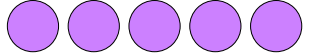

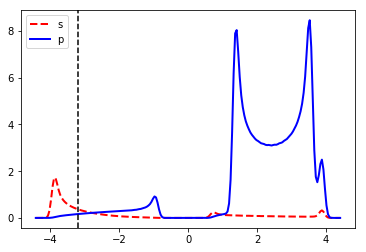

In [32]:
Li1 = Atoms('Li', positions=[(0, 0, 0)], cell=[3.04,10,10], pbc=[1,0,0])
Li1.center()
write('Li1.png', Li1*(5,1,1))
display(Image(filename='Li1.png'))

calcLi1 = GPAW(xc='LDA', 
               mode="lcao",
               kpts=(100,1,1),
               basis='dzp',
               txt='Li1.txt')

Li1.set_calculator(calcLi1)
eLi1 = Li1.get_potential_energy()
calcLi1.write('Li1.gpw')

calcLi1 = GPAW('Li1.gpw', txt=None)

try:
    efLi1 = calcLi1.get_fermi_level()
except ValueError:
    efLi1 = 0
energyLi1, dosLi1 = calcLi1.get_orbital_ldos(0, spin=0, angular='spdf', width=0.1)

enLi1 = energyLi1
#enLi1 = (energyLi1 - efLi1)

Spdos_Li1 = [0] * len(dosLi1)
Ppdos_Li1 = [0] * len(dosLi1)
Dpdos_Li1 = [0] * len(dosLi1)
temp = calcLi1.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Li1 = list(np.array(Spdos_Li1) + np.array(temp))
temp = calcLi1.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Li1 = list(np.array(Ppdos_Li1) + np.array(temp))
temp = calcLi1.get_orbital_ldos(0, spin=0, angular='d', width=0.1)[1]
Dpdos_Li1 = list(np.array(Dpdos_Li1) + np.array(temp))

#plt.plot(enLi1, dosLi1, 'k-', linewidth = 4.0, label='dos')
plt.plot(enLi1, Spdos_Li1, 'r--', linewidth = 2.0, label = 's')
plt.plot(enLi1, Ppdos_Li1, 'b-',linewidth = 2.0, label = 'p')
#plt.plot(enLi1, Dpdos_Li1, 'g-.',linewidth = 2.0, label = 'd')
plt.axvline(x=efLi1, color='k', linestyle='--')

#plt.xlim(-5,5)
#plt.ylim(0,10)
plt.legend()
plt.show()

### 2D lithium in a vacuum

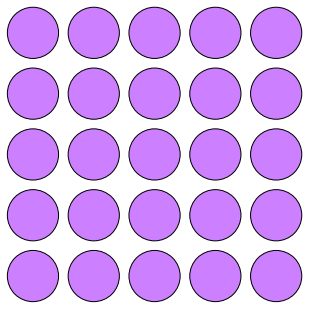

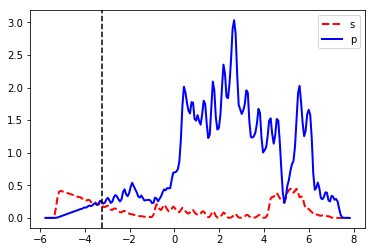

In [34]:
Li2 = Atoms('Li', positions=[(0, 0, 0)], cell=[3.04,3.04,10], pbc=[1,1,0])
Li2.center()
write('Li2.png', Li2*(5,5,1))
display(Image(filename='Li2.png'))

calcLi2 = GPAW(xc='LDA', 
               mode="lcao",
               kpts=(40,40,1),
               basis='dzp',
               txt='Li2.txt')

Li2.set_calculator(calcLi2)
eLi2 = Li2.get_potential_energy()
calcLi2.write('Li2.gpw')

calcLi2 = GPAW('Li2.gpw', txt=None)

try:
    efLi2 = calcLi2.get_fermi_level()
except ValueError:
    efLi2 = 0
energyLi2, dosLi2 = calcLi2.get_orbital_ldos(0, spin=0, angular='spdf', width=0.1)

enLi2 = energyLi2
#enLi2 = (energyLi2 - efLi2)

Spdos_Li2 = [0] * len(dosLi2)
Ppdos_Li2 = [0] * len(dosLi2)
Dpdos_Li2 = [0] * len(dosLi2)
temp = calcLi2.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Li2 = list(np.array(Spdos_Li2) + np.array(temp))
temp = calcLi2.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Li2 = list(np.array(Ppdos_Li2) + np.array(temp))
temp = calcLi2.get_orbital_ldos(0, spin=0, angular='d', width=0.1)[1]
Dpdos_Li2 = list(np.array(Dpdos_Li2) + np.array(temp))

#plt.plot(enLi2, dosLi2, 'k-', linewidth = 4.0, label='dos')
plt.plot(enLi2, Spdos_Li2, 'r--', linewidth = 2.0, label = 's')
plt.plot(enLi2, Ppdos_Li2, 'b-',linewidth = 2.0, label = 'p')
#plt.plot(enLi2, Dpdos_Li2, 'g-.',linewidth = 2.0, label = 'd')
plt.axvline(x=efLi2, color='k', linestyle='--')

#plt.xlim(-5,5)
#plt.ylim(0,10)
plt.legend()
plt.show()

### 3D Lithium

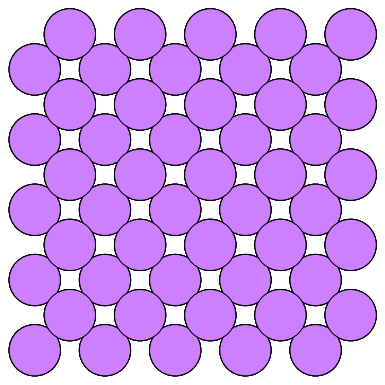

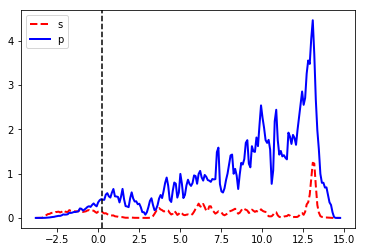

In [36]:
#Li3 = Atoms('Li', positions=[(0, 0, 0)], cell=[3.04,3.04,3.04], pbc=[1,1,1])
#Li3.center()

Li3 = bulk("Li", "bcc", a=3.51, cubic=True)
#Li *= (2, 2, 2)
Li3.pbc = (True, True, True) #pbc = periodic boundary conditions
#view(Li)
write('Li3.png', Li3*(5,5,5))
display(Image(filename='Li3.png'))

calcLi3 = GPAW(xc='LDA', 
               mode="lcao",
               kpts=(16,16,16),
               basis='dzp',
               txt='Li3.txt')

Li3.set_calculator(calcLi3)
eLi3 = Li3.get_potential_energy()
calcLi3.write('Li3.gpw')

calcLi3 = GPAW('Li3.gpw', txt=None)

try:
    efLi3 = calcLi3.get_fermi_level()
except ValueError:
    efLi3 = 0
energyLi3, dosLi3 = calcLi3.get_orbital_ldos(0, spin=0, angular='spdf', width=0.1)

enLi3 = energyLi3
#enLi2 = (energyLi2 - efLi2)

Spdos_Li3 = [0] * len(dosLi3)
Ppdos_Li3 = [0] * len(dosLi3)
Dpdos_Li3 = [0] * len(dosLi3)
temp = calcLi3.get_orbital_ldos(0, spin=0, angular='s', width=0.1)[1]
Spdos_Li3 = list(np.array(Spdos_Li3) + np.array(temp))
temp = calcLi3.get_orbital_ldos(0, spin=0, angular='p', width=0.1)[1]
Ppdos_Li3 = list(np.array(Ppdos_Li3) + np.array(temp))
temp = calcLi3.get_orbital_ldos(0, spin=0, angular='d', width=0.1)[1]
Dpdos_Li3 = list(np.array(Dpdos_Li3) + np.array(temp))

#plt.plot(enLi2, dosLi2, 'k-', linewidth = 4.0, label='dos')
plt.plot(enLi3, Spdos_Li3, 'r--', linewidth = 2.0, label = 's')
plt.plot(enLi3, Ppdos_Li3, 'b-',linewidth = 2.0, label = 'p')
#plt.plot(enLi2, Dpdos_Li2, 'g-.',linewidth = 2.0, label = 'd')
plt.axvline(x=efLi3, color='k', linestyle='--')

#plt.xlim(-5,5)
#plt.ylim(0,10)
plt.legend()
plt.show()